# Prediction using Decision Tree Algorithm (Level - Intermediate)

### Objective:
● Create the Decision Tree classifier and visualize it graphically.


● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

### Author:     Surendran R

### Step:1 Importing all required libraries

In [151]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 

import lux
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Step:2 Reading the csv file (data set)

In [87]:
path=r"C:\Users\Anamika\Desktop\TSF\task6\Iris.csv"

In [88]:
iris_df=pd.read_csv(path)

In [89]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [90]:
iris_df.shape

(150, 6)

In [91]:
iris_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Step:3 Data preparation

In [92]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [93]:
iris_new=iris_df.copy()

In [94]:
#we are droping id  since it is for identification 

In [95]:
iris_new=iris_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]

In [96]:
iris_new.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
iris_new.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [98]:
iris_new.iloc[iris_new["Species"]=="Iris-versicolor"]=0
iris_new.iloc[iris_new["Species"]=="Iris-virginica"]=1
iris_new.iloc[iris_new["Species"]=="Iris-setosa"]=2

In [99]:
iris_new.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [100]:
iris_new.Species=iris_new.Species.astype('int')

In [101]:
iris_new.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [102]:
ir_train,ir_test=train_test_split(iris_new,test_size=0.2,random_state=123)


In [103]:
x_train=ir_train.drop(['Species'],1)
y_train=ir_train['Species']
x_test=ir_test.drop(['Species'],1)
y_test=ir_test['Species']

In [104]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

### Step:4 Training the Algorithm

In [105]:
dtree=DecisionTreeClassifier()

In [106]:
#parameter turning

In [107]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':np.linspace(2,10,10).round(),
    'min_samples_split':np.linspace(0.01,0.5,50).round(2),
    'min_samples_leaf':np.linspace(0.01,0.5,50).round(2),
    'max_leaf_nodes':np.linspace(5,50,20).round().astype(int),
    'class_weight':['balanced']
}

In [154]:
rnd=RandomizedSearchCV(dtree,cv=10,param_distributions=params,n_iter=1000,scoring='accuracy',verbose=1,n_jobs=-1)

In [155]:
rnd.fit(x_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 6320 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   45.3s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=1000,
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2.,  3.,  4.,  5.,  6.,  6.,  7.,  8.,  9., 10.]),
                                        'max_leaf_nodes': array([ 5,  7, 10, 12, 14, 17, 19, 22, 24, 26, 29, 31, 33, 36, 38, 41, 43,
       45, 48, 50]),
                                        'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0...
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
                                        'min_samples_split': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.3

In [156]:
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean Validation Score: {0:.8f} (std:{1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [157]:
report(rnd.cv_results_,3)

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.26, 'min_samples_leaf': 0.03, 'max_leaf_nodes': 43, 'max_depth': 5.0, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.23, 'min_samples_leaf': 0.13, 'max_leaf_nodes': 36, 'max_depth': 4.0, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.48, 'min_samples_leaf': 0.01, 'max_leaf_nodes': 24, 'max_depth': 10.0, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.32, 'min_samples_leaf': 0.01, 'max_leaf_nodes': 41, 'max_depth': 2.0, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.01, 'min

Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.27, 'min_samples_leaf': 0.08, 'max_leaf_nodes': 19, 'max_depth': 9.0, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.42, 'min_samples_leaf': 0.06, 'max_leaf_nodes': 17, 'max_depth': 8.0, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.46, 'min_samples_leaf': 0.19, 'max_leaf_nodes': 14, 'max_depth': 6.0, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.23, 'min_samples_leaf': 0.3, 'max_leaf_nodes': 26, 'max_depth': 4.0, 'criterion': 'entropy', 'class_weight': 'balanced'}

Model with rank: 1
Mean Validation Score: 1.00000000 (std:0.000)
Parameters: {'min_samples_split': 0.28, 'min_samples_leaf': 0.01,

In [158]:
# we chooseing rank 1

In [159]:
rnd.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5.0, max_leaf_nodes=43, min_samples_leaf=0.03,
                       min_samples_split=0.26)

### Step:5 prediction

In [160]:
predicted=rnd.predict(x_test)

In [161]:
results=pd.DataFrame(list(zip(y_train,predicted)),columns=['real','predicted'])

In [162]:
results

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Step:6 visvalization

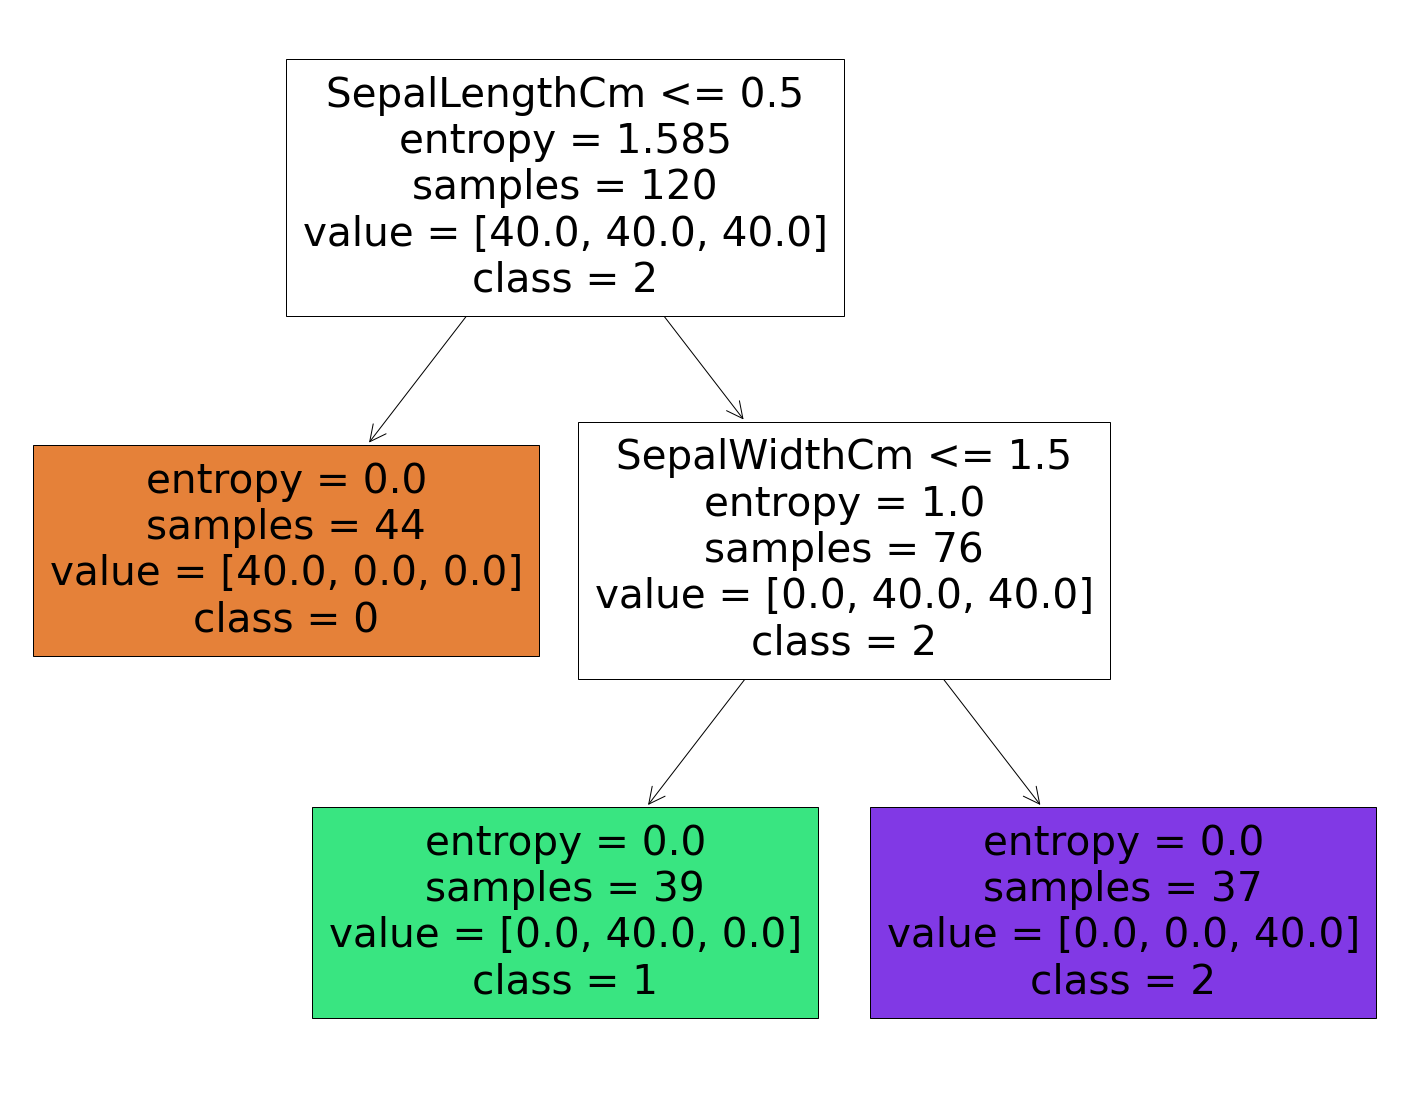

In [163]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rnd.best_estimator_, 
                   feature_names=x_train.columns,  
                   class_names=["0","1","2"],
                   filled=True)